# 🚀 Proyecto Aurelion - Análisis de Ventas

Este notebook muestra un análisis exploratorio de los datos del sistema **Aurelion**.  
Trabajaremos con los archivos CSV de **clientes, productos, ventas y detalle de ventas**, 
para obtener información como:

- 💰 Venta total  
- 🏆 Productos más vendidos  
- 👥 Mejores clientes  
- 📊 Total de clientes y resumen general  

---

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Configurar visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (8,4)

# Ruta base
ruta_base = r"C:\Users\Luna\Desktop\Guayerd\AurelionProyecto\Aurelion"

# Leer archivos CSV
clientes = pd.read_csv(os.path.join(ruta_base, "clientes.csv"))
productos = pd.read_csv(os.path.join(ruta_base, "productos.csv"))
ventas = pd.read_csv(os.path.join(ruta_base, "ventas.csv"))
detalle = pd.read_csv(os.path.join(ruta_base, "detalle_ventas.csv"))

print("✅ Archivos cargados correctamente.")
print(" Columnas de detalle_ventas:", detalle.columns.tolist())

✅ Archivos cargados correctamente.
 Columnas de detalle_ventas: ['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe']


## 👀 Vista previa de los datos

Veamos las primeras filas de cada archivo para conocer su estructura.

In [18]:
# Crear columna total = cantidad × precio_unitario
detalle["total"] = detalle["cantidad"] * detalle["precio_unitario"]

# Verificar el cálculo
detalle.head()

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,total
0,1,90,Toallas Húmedas x50,1,"2,902","2,902","2,902"
1,2,82,Aceitunas Negras 200g,5,"2,394","11,970","2,3942,3942,3942,3942,394"
2,2,39,Helado Vainilla 1L,5,469,"2,345",469469469469469
3,2,70,Fernet 750ml,2,"4,061","8,122","4,0614,061"
4,2,22,Medialunas de Manteca,1,"2,069","2,069","2,069"


In [19]:
# Unir detalle con productos
detalle_prod = detalle.merge(productos, on="id_producto", how="left")

# Unir con ventas
ventas_completa = detalle_prod.merge(ventas, on="id_venta", how="left")

# Unir con clientes
ventas_completa = ventas_completa.merge(clientes, on="id_cliente", how="left")

ventas_completa.head()

,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,total,nombre_producto_y,categoria,precio_unitario_y,fecha,id_cliente,nombre_cliente_x,email_x,medio_pago,nombre_cliente_y,email_y,ciudad,fecha_alta
0,1,90,Toallas Húmedas x50,1,"2,902","2,902","2,902",Toallas Húmedas x50,Limpieza,2902,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,Aceitunas Negras 200g,5,"2,394","11,970","2,3942,3942,3942,3942,394",Aceitunas Negras 200g,Limpieza,2394,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,Helado Vainilla 1L,5,469,"2,345",469469469469469,Helado Vainilla 1L,Alimentos,469,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,Fernet 750ml,2,"4,061","8,122","4,0614,061",Fernet 750ml,Limpieza,4061,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,Medialunas de Manteca,1,"2,069","2,069","2,069",Medialunas de Manteca,Limpieza,2069,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


In [20]:
print("👥 CLIENTES:")
display(clientes.head())

print("📦 PRODUCTOS:")
display(productos.head())

print("🧾 VENTAS:")
display(ventas.head())

print("📋 DETALLE DE VENTAS:")
display(detalle.head())

👥 CLIENTES:


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05


📦 PRODUCTOS:


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777


🧾 VENTAS:


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta


📋 DETALLE DE VENTAS:


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe,total
0,1,90,Toallas Húmedas x50,1,"2,902","2,902","2,902"
1,2,82,Aceitunas Negras 200g,5,"2,394","11,970","2,3942,3942,3942,3942,394"
2,2,39,Helado Vainilla 1L,5,469,"2,345",469469469469469
3,2,70,Fernet 750ml,2,"4,061","8,122","4,0614,061"
4,2,22,Medialunas de Manteca,1,"2,069","2,069","2,069"


## 🔗 Combinación de Tablas

Para analizar correctamente las ventas, combinaremos las tablas mediante sus claves:
- `id_cliente`
- `id_venta`
- `id_producto`

In [16]:
ventas_detalle = pd.merge(detalle, ventas, on="id_venta")
ventas_completa = pd.merge(ventas_detalle, productos, on="id_producto")
ventas_completa = pd.merge(ventas_completa, clientes, on="id_cliente")

print("✅ Tablas combinadas correctamente.")
display(ventas_completa.head())

✅ Tablas combinadas correctamente.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,fecha,id_cliente,nombre_cliente_x,email_x,medio_pago,nombre_producto_y,categoria,precio_unitario_y,nombre_cliente_y,email_y,ciudad,fecha_alta
0,1,90,Toallas Húmedas x50,1,"2,902","2,902",2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,Toallas Húmedas x50,Limpieza,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,Aceitunas Negras 200g,5,"2,394","11,970",2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Aceitunas Negras 200g,Limpieza,2394,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,Helado Vainilla 1L,5,469,"2,345",2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Helado Vainilla 1L,Alimentos,469,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,Fernet 750ml,2,"4,061","8,122",2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Fernet 750ml,Limpieza,4061,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,Medialunas de Manteca,1,"2,069","2,069",2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Medialunas de Manteca,Limpieza,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


## 💰 Venta Total del Proyecto Aurelion

In [17]:
print(ventas_completa.columns)

Index(['id_venta', 'id_producto', 'nombre_producto_x', 'cantidad',
       'precio_unitario_x', 'importe', 'fecha', 'id_cliente',
       'nombre_cliente_x', 'email_x', 'medio_pago', 'nombre_producto_y',
       'categoria', 'precio_unitario_y', 'nombre_cliente_y', 'email_y',
       'ciudad', 'fecha_alta'],
      dtype='object')


In [22]:
# Convierte la columna "total" a numérica
ventas_completa["total"] = pd.to_numeric(ventas_completa["total"], errors='coerce')

# Ahora calculamos la venta total
ventas_totales = ventas_completa["total"].sum()
print(f"💵 Venta total: ${ventas_totales:,.2f}")

💵 Venta total: $8,858,341,870,794,534.00


## 🏆 Top 5 Productos Más Vendidos

C:\Users\Luna\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


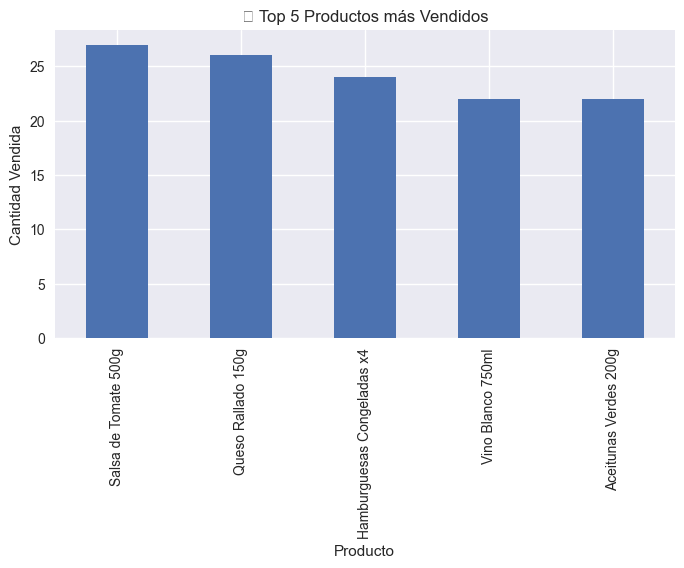

In [24]:
top_productos = (ventas_completa.groupby("nombre_producto_x")["cantidad"]
                 .sum()
                 .sort_values(ascending=False)
                 .head(5))

top_productos.plot(kind="bar")
plt.title("📦 Top 5 Productos más Vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.show()


## 👥 Clientes con Mayor Monto de Compra

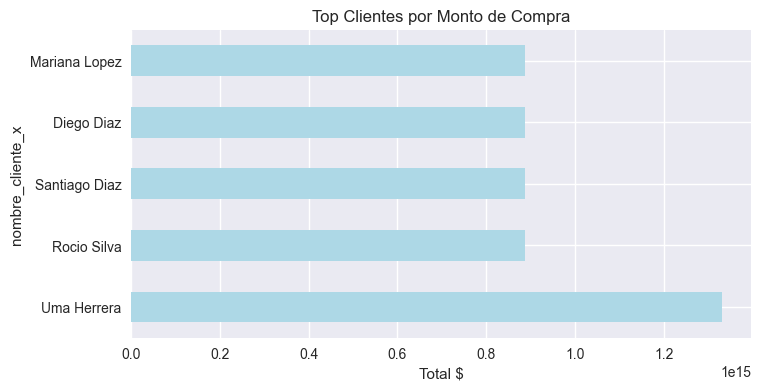

In [27]:
top_clientes = (
    ventas_completa.groupby("nombre_cliente_x")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_clientes.plot(kind="barh", title="Top Clientes por Monto de Compra", xlabel="Total $", color="lightblue" \
"")
plt.show()

## 📊 Indicadores Generales
Un resumen con los principales KPIs del sistema de ventas.

In [26]:
total_clientes = clientes["id_cliente"].nunique()
total_productos_vendidos = ventas_completa["cantidad"].sum()
promedio_venta = ventas_totales / total_clientes

print("📊 INDICADORES CLAVE:")
print(f"- Total de ventas: ${ventas_totales:,.2f}")
print(f"- Total de clientes: {total_clientes}")
print(f"- Total de productos vendidos: {total_productos_vendidos}")
print(f"- Promedio de venta por cliente: ${promedio_venta:,.2f}")

📊 INDICADORES CLAVE:
- Total de ventas: $8,858,341,870,794,534.00
- Total de clientes: 100
- Total de productos vendidos: 1016
- Promedio de venta por cliente: $88,583,418,707,945.34


## 🎯 Conclusiones

- Los productos más vendidos ayudan a definir estrategias de stock.  
- Los clientes principales son clave para la fidelización.  
- El análisis de ventas permite estimar ingresos y crecimiento del negocio.  

📌 Este análisis puede ampliarse con dashboards interactivos usando **Plotly**, **Power BI** o **Tableau**.